In [ ]:
from pandas import DataFrame
from funcs.data_exploration import DataExploration


# for better resolution plots
# %config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set_theme()

In [26]:
path = "C:/Users/Asus FX516P 9775/Documents/GitHub/data-mining"

dataCustomer: DataFrame = pd.read_csv(path + "/data/DM_AIAI_CustomerDB.csv")
dataFlights: DataFrame = pd.read_csv(path + "/data/DM_AIAI_FlightsDB.csv")


print("Shape of dataset:", dataCustomer.shape)
print("Shape of dataset:", dataFlights.shape)
print("\nInfo")
print(dataCustomer.info)
print(dataFlights.info)
print("\nSummary:")
print(dataCustomer.describe(include="all").T)
print(dataFlights.describe(include="all").T)





dataCustomer = dataCustomer.set_index("Loyalty#")
dataFlights = dataFlights.set_index("Loyalty#")

dataFinal = dataCustomer.join(dataFlights, "Loyalty#")

Shape of dataset: (16921, 21)
Shape of dataset: (608436, 10)

Info
<bound method DataFrame.info of        Unnamed: 0  Loyalty# First Name    Last Name        Customer Name  \
0               0    480934    Cecilia  Householder  Cecilia Householder   
1               1    549612      Dayle        Menez          Dayle Menez   
2               2    429460     Necole       Hannon        Necole Hannon   
3               3    608370      Queen        Hagee          Queen Hagee   
4               4    530508     Claire      Latting       Claire Latting   
...           ...       ...        ...          ...                  ...   
16916          15    100012      Ethan     Thompson       Ethan Thompson   
16917          16    100013      Layla        Young          Layla Young   
16918          17    100014     Amelia      Bennett       Amelia Bennett   
16919          18    100015   Benjamin       Wilson      Benjamin Wilson   
16920          19    100016       Emma       Martin          Emma

In [27]:
print("\nMissing Values per column:")
print(dataCustomer.isnull().sum())
print(dataFlights.isnull().sum())
print("\nDuplicates:")
print(dataCustomer.duplicated().sum())
print(dataFlights.duplicated().sum())


Missing Values per column:
Unnamed: 0                     0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

Duplicates:
0
3

In [30]:
print("\nUnique Education Levels:", dataCustomer['Education'].unique())
print("\nCounts by Education:\n", dataCustomer['Education'].value_counts())
print("\nCounts by Marital Status:\n", dataCustomer['Marital Status'].value_counts())


Unique Education Levels: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']

Counts by Education:
 Education
Bachelor                10586
College                  4283
High School or Below      792
Doctor                    742
Master                    518
Name: count, dtype: int64

Counts by Marital Status:
 Marital Status
Married     9842
Single      4539
Divorced    2540
Name: count, dtype: int64


In [34]:
print("\nIncome stats:")
filtered = dataCustomer[dataCustomer["Education"] != "College"]
print("Min:", filtered['Income'].min())
print("Max:", dataCustomer['Income'].max())
print("Mean:", dataCustomer['Income'].mean())
print("\nAverage income by Education:")
print(dataCustomer.groupby('Education')['Income'].mean())

print("\nAverage income by Marital Status:")
print(dataCustomer.groupby('Marital Status')['Income'].mean())


Income stats:
Min: 10037.0
Max: 99981.0
Mean: 37758.03840009467

Average income by Education:
Education
Bachelor                56397.523445
College                     0.000000
Doctor                  20052.795148
High School or Below    20296.805556
Master                  20584.031008
Name: Income, dtype: float64

Average income by Marital Status:
Marital Status
Divorced    40715.525591
Married     43879.511089
Single      22819.593467
Name: Income, dtype: float64


In [ ]:
print("\nCorrelation matrix:")
print(dataCustomer.corr(numeric_only=True))



Correlation matrix:
                         Unnamed: 0  Latitude  Longitude    Income  \
Unnamed: 0                 1.000000  0.001206   0.000994 -0.013994   
Latitude                   0.001206  1.000000  -0.764840 -0.002009   
Longitude                  0.000994 -0.764840   1.000000  0.002928   
Income                    -0.013994 -0.002009   0.002928  1.000000   
Customer Lifetime Value    0.122797 -0.002207   0.006218  0.024026   

                         Customer Lifetime Value  
Unnamed: 0                              0.122797  
Latitude                               -0.002207  
Longitude                               0.006218  
Income                                  0.024026  
Customer Lifetime Value                 1.000000  


Duplicate columns: Index([], dtype='object')


ValueError: cannot reindex on an axis with duplicate labels

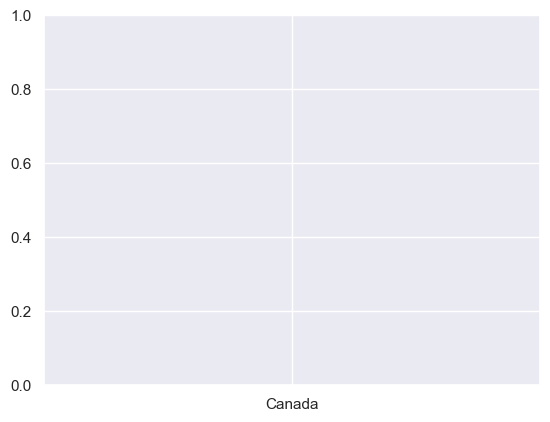

In [43]:
duplicates = dataCustomer.columns[dataCustomer.columns.duplicated()]
print("Duplicate columns:", duplicates)
dataCustomer = dataCustomer.loc[:,~dataCustomer.columns.duplicated()]

dataCustomerWithouthDuplicates = dataCustomer.drop_duplicates()

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x="Country", y="Income", hue="Education", data=dataCustomerWithouthDuplicates)
plt.show()


